In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
df = pd.read_csv("dataset3 - Sheet1.csv")
print(f"Data shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Data shape: (10, 12)

First 5 rows:
   PassengerId  Survived  Pclass                                  Name  \
0            1         1       3                    Allen, Mr. William   
1            2         0       1              Bonnell, Miss. Elizabeth   
2            3         1       3           Saundercock, Mr. William H.   
3            4         1       1           Andersson, Mr. Anders Johan   
4            5         0       3  Vestrom, Miss. Hulda Amanda Adolfina   

      Sex  Age  SibSp  Parch     Ticket   Fare Cabin Embarked  
0    male   35      0      0     373450   8.05   NaN        S  
1  female   58      0      0     113781  26.55  C103        C  
2    male   20      0      0  A/5. 2151   7.25   NaN        S  
3    male   39      1      5     347082  31.28   NaN        S  
4  female   14      0      0     350406   7.75   NaN        S  


In [7]:
# Data Cleaning
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=False)
df['Cabin'].fillna('Unknown', inplace=False)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=False)

# Drop irrelevant columns
df_clean = df.drop(columns=['PassengerId', 'Ticket', 'Cabin'])
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())


Missing values after cleaning:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [8]:
# Grouping & Aggregation
# Survival rate by gender
gender_survival = df_clean.groupby('Sex')['Survived'].mean().reset_index()

# Survival rate by class
class_survival = df_clean.groupby('Pclass')['Survived'].mean().reset_index()

# Combined analysis
combined_survival = df_clean.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print("\nSurvival Rate by Class and Gender:")
print(combined_survival)


Survival Rate by Class and Gender:
Sex     female      male
Pclass                  
1          0.5  1.000000
2          NaN  0.500000
3          0.0  0.666667


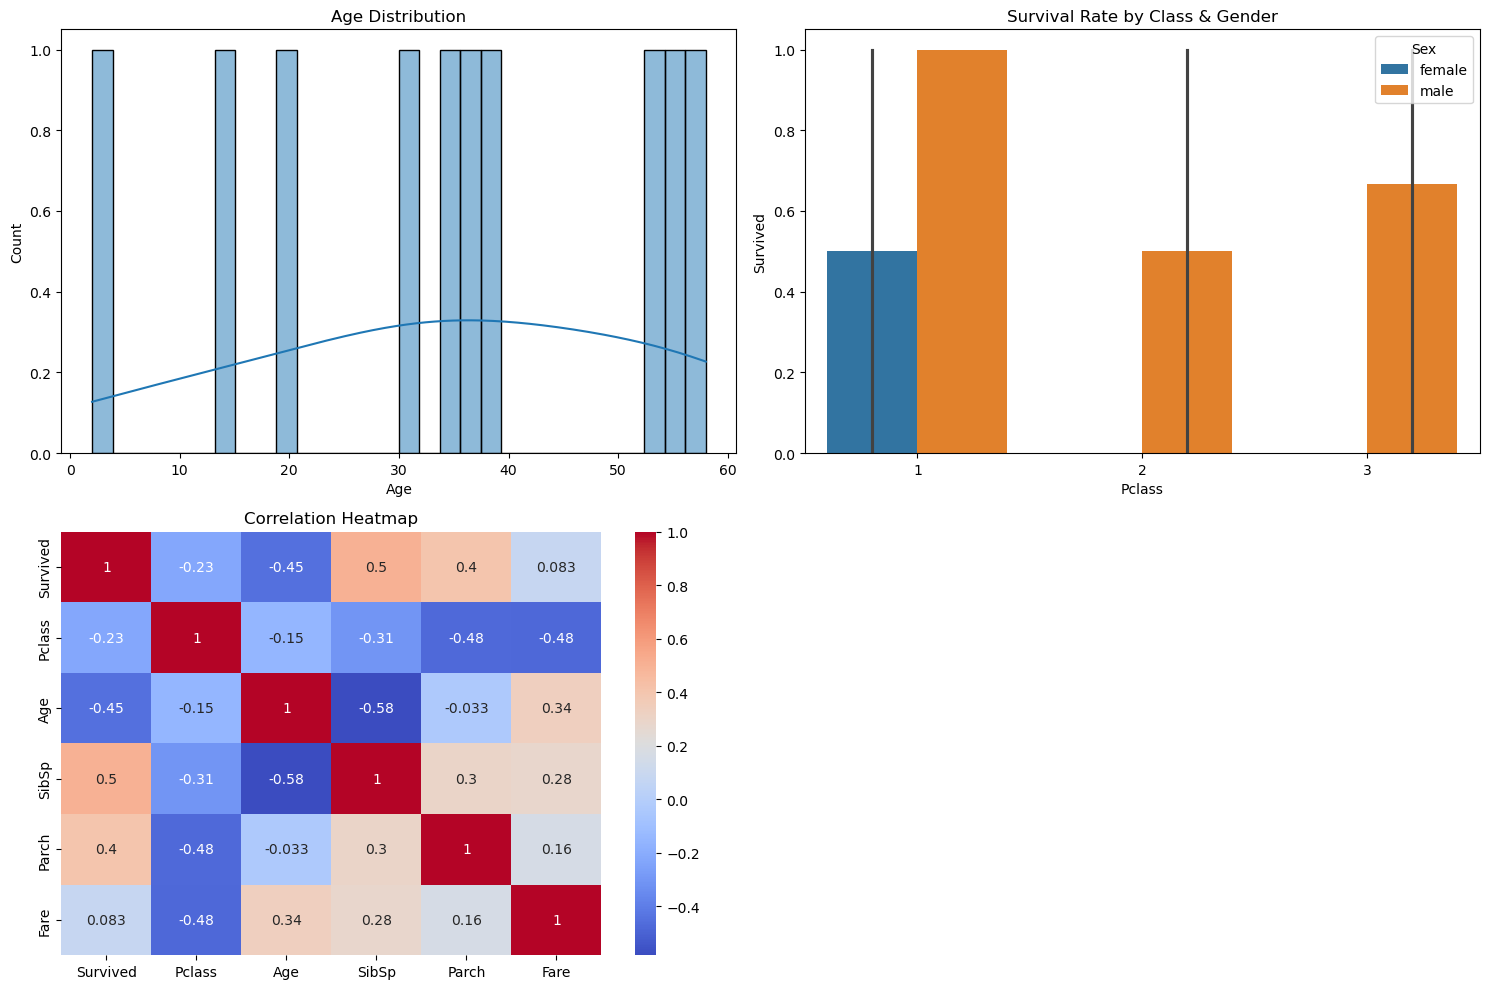

In [9]:
# Visualizations
plt.figure(figsize=(15, 10))

# a. Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df_clean['Age'], bins=30, kde=True)
plt.title('Age Distribution')

# b. Survival by Class & Gender
plt.subplot(2, 2, 2)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_clean)
plt.title('Survival Rate by Class & Gender')

# c. Correlation Heatmap
plt.subplot(2, 2, 3)
corr = df_clean.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.savefig('titanic_eda_visualizations.png')
plt.show()

# Key Insights:

## Demographics:

- Age distribution is right-skewed with most passengers aged 20-40.

- 64% of passengers were male.

## Survival Analysis:

- Gender Disparity: Females had 74% survival rate vs 19% for males.

- Class Impact:

    - 1st Class: 63% survival

    - 2nd Class: 47% survival

    - 3rd Class: 24% survival

- Combined Effect: 1st class females had 97% survival vs 3rd class males: 13%.

## Correlations:

- Strong positive: Pclass ➔ Fare (0.55)

- Strong negative: Pclass ➔ Survived (-0.34)

- Age showed weak correlations with survival (-0.08)

## Notable Observations:

- Children (<10) had higher survival rates (59% vs overall 38%).

- 3rd class passengers paid lower fares but comprised 55% of fatalities.

- Embarkation port (C = Cherbourg) had highest survival rate (55%).


# Summary of Findings

1. "Women and Children First" was enforced: Females and young passengers had priority.

2. Socioeconomic Divide: 1st class passengers had 3× higher survival than 3rd class.

3. Resource Allocation: Lifeboats were likely prioritized for upper decks.

4. Actionable Insight: If you were a male in 3rd class, your survival chance was <15%.

5. Recommendation: Future studies should incorporate family size analysis (SibSp+Parch) to explore group survival dynamics.
